In [1]:
import pandas as pd

In [21]:
data = pd.read_csv("diabetes.csv", nrows = 50)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='BMI', ylabel='Outcome'>

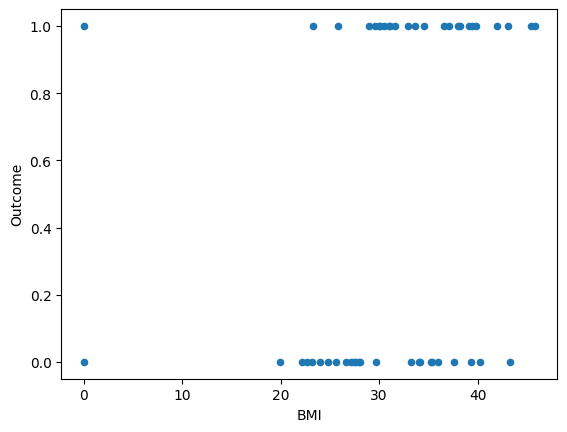

In [29]:
data.plot.scatter(x='BMI',y='Outcome')

In [27]:
X = data['BMI'].to_numpy()
Y = data['Outcome'].to_numpy()

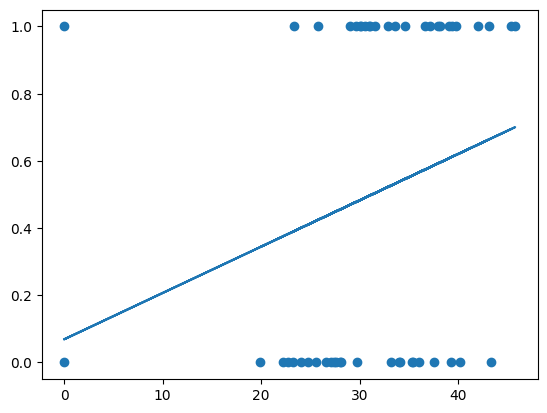

In [28]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

linreg = LinearRegression()
linreg.fit(X.reshape(-1,1),Y)

plt.scatter(X,Y)
plt.plot(X, linreg.predict(X.reshape(-1,1)))

## Logistic Regression

Let’s recall the equation of simple linear regression.
 
$$\hat{y} = \beta_0 + \beta_1\ x$$

where  $\beta_0$ and $\beta_1$ are the regression coefficients and $x$ is the input feature.

**In logistic regression, we pass the output of the linear regression $\hat{y}$ to a function known as the sigmoid function**. The sigmoid function is of the following form:

$$\sigma(z) = \frac 1 {(1+ e^{-z})} $$

 
where $z$ is any input real number. We can plot $\sigma(z)$ as follows:

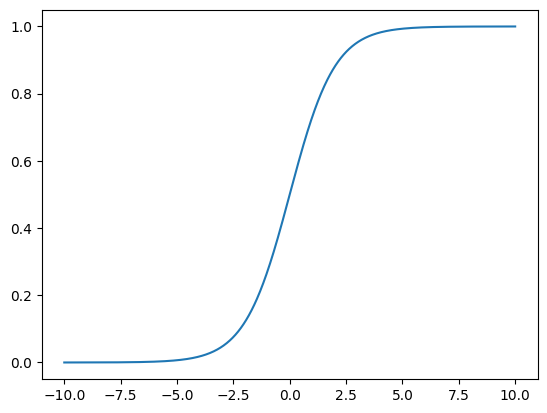

In [36]:
import numpy as np

z = np.linspace(-10,10,1000)

def sigmoid(z):
    return 1/ (1+np.exp(-z))

plt.plot(z,sigmoid(z))

The function $\sigma(z)$, shown above, maps any real number to the [0, 1] interval, making it useful for classification. This function $\sigma(z)$ is sometimes also called the logistic sigmoid function or logistic curve.
 

As mentioned above, $\hat{y}$ is the input to this sigmoid function $\sigma(z)$, which means that $z=\beta_0 + \beta_1 x$. Let the output of the logistic regression for a sample $x$ be $p(x)$. Then $$p(x) = \sigma(z) = \frac 1 {1 + e^{-z}} = \frac 1 {1 + e^{-(\beta_0 + \beta_1x)}}$$ 

**The output of logistic regression, $p(x)$ gives us the probability of a sample belonging to class 1, and $1-p(x)$ gives us the probability of it belonging to class 0.**

From the above equations, we can see that we need to estimate the regression coefficients $\beta_0$, $\beta_1$. The discussion of the optimization method used to compute the coefficients is beyond the scope of this chapter. For now, we simply rely on Scikit-Learn's [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) object to compute the values for us.

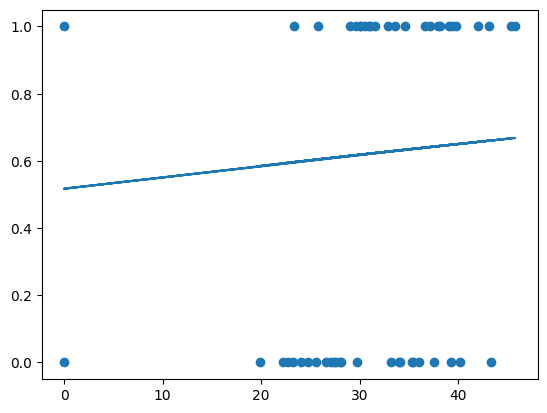

In [37]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

linreg = LinearRegression()
linreg.fit(X.reshape(-1,1),Y)

plt.scatter(X,Y)
plt.plot(X, sigmoid(linreg.predict(X.reshape(-1,1))))